<a href="https://colab.research.google.com/github/amywinecoff/ml-teaching/blob/main/cdh/presentation/knn_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

In [2]:
def plot_supervised(df, uk_smokiness, uk_color, save=False):
    
    #plot params
    plt.style.use('ggplot')
    plt.rc('font', size=20)
    plt.rcParams["figure.autolayout"] = True
    
    #make a prediction for the uknown spirit type using knn
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(df[['smokiness', 'color']], df['type'])
    uk_type = neigh.predict([[uk_smokiness,uk_color]])[0]
    print(f'Unknown spirit type is: {uk_type}')
    
    unknown_spirit = {'spirit':'Unknown Spirit','smokiness':uk_smokiness, 'color':uk_color, 'type':uk_type}
    unknown_spirit_df = pd.DataFrame([unknown_spirit])               
    df = pd.concat([df, unknown_spirit_df], ignore_index=True)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)
    sns.scatterplot(y=df['smokiness'], x=df['color'], s=170, style=df['type'])
    plt.xlim([0, 7])
    plt.ylim([0,7.5])
    
    for i in range(df.shape[0]):
        plt.text(x=df['color'][i]+.1,
                 y=df['smokiness'][i]+.1, 
                 s=df['spirit'][i], 
                 fontdict=dict(color='blue',size=16),
                 bbox=dict(facecolor='yellow',alpha=0.5))
    
    #annoying hack to fix legend marker size
    lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=16)

    for handle in lgnd.legendHandles:
        handle.set_sizes([200])
        handle.set_color('r')


In [3]:
spirits = [['El Buho Espadin', 3, 0.5, 'Mezcal'],
            ['Casamigos Reposado', 1, 1, 'Mezcal'],
            ['Espolon Anejo',1.5, 2, 'Mezcal'], 
            ['Laphroaig 12', 7, 4, 'Whiskey'],
            ['Macallan 12', 5, 4, 'Whiskey'],
            ['Knob Creek Bourbon', 4, 5, 'Whiskey']]

df = pd.DataFrame(spirits, columns=['spirit','smokiness', 'color', 'type' ])

df.head(10)

,spirit,smokiness,color,type
0,El Buho Espadin,3.0,0.5,Mezcal
1,Casamigos Reposado,1.0,1.0,Mezcal
2,Espolon Anejo,1.5,2.0,Mezcal
3,Laphroaig 12,7.0,4.0,Whiskey
4,Macallan 12,5.0,4.0,Whiskey
5,Knob Creek Bourbon,4.0,5.0,Whiskey


In [4]:
uk_smokiness = 2
uk_color = 3

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(df[['smokiness', 'color']].values, df['type'])
uk_type = neigh.predict([[uk_smokiness,uk_color]])[0]
print(f'Unknown spirit type is: {uk_type}')

Unknown spirit type is: Mezcal


Unknown spirit type is: Mezcal


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


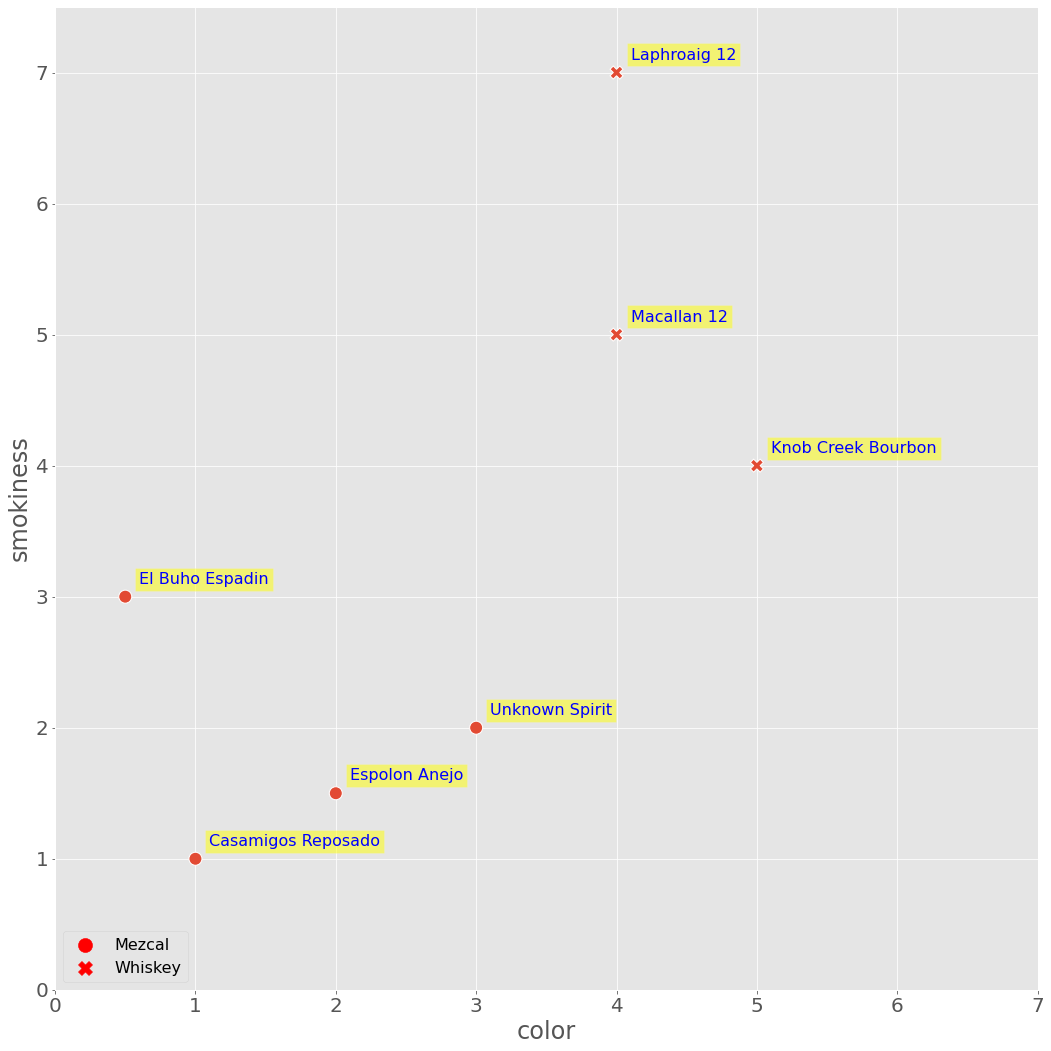

In [5]:
plot_supervised(df, uk_smokiness, uk_color)